# Compare the wavenumber spectra of ROMS surface SST and himawari-8

In [1]:
import dask
dask.config.set(scheduler='processes')


In [2]:
import xarray as xr
import numpy as np

from matplotlib import rcParams
from scipy.interpolate import interp1d

from sfoda.utils.maptools import plotmap


rcParams["font.size"] = "14"
rcParams['axes.labelsize']='medium'

import matplotlib.pyplot as plt

from sfoda.utils.barycentric import BarycentricInterp


Bad key "backend.qt5" on line 5 in
/home/mrayson/.config/matplotlib/matplotlibrc.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
%matplotlib inline

rcParams["font.size"] = "12"
rcParams['axes.labelsize']='medium'

In [67]:
hw8file = '../DATA/NWS_SST_nighttime_FebJun2017.nc'

ds_hw8 = xr.open_dataset(hw8file)
ds_hw8

<xarray.Dataset>
Dimensions:        (lat: 1101, lon: 1801, time: 122)
Coordinates:
  * lat            (lat) float32 -4.0 -4.0199966 -4.040001 ... -25.979996 -26.0
  * lon            (lon) float32 104.0 104.02 104.04 ... 139.95999 139.98 140.0
  * time           (time) datetime64[ns] 2017-01-01T16:00:00 ... 2017-06-01T1...
Data variables:
    sst_night_mu   (time, lat, lon) float32 ...
    sst_night_var  (time, lat, lon) float32 ...

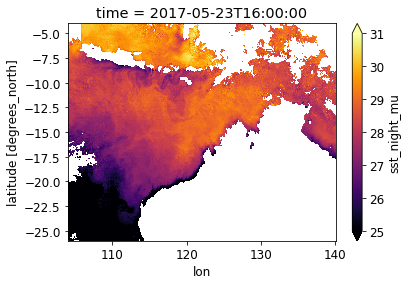

In [69]:
mytime = '2017-05-24 00:00:00'

myds_hw8 = ds_hw8['sst_night_mu'].sel(time=mytime, method='nearest').compute() - 273.15
plt.figure()
myds_hw8.plot(vmin=25,vmax=31, cmap='inferno')

In [71]:
mapfile = '/group/pawsey0106/mrayson/DATA/COAST/GSHHS_shp/i/GSHHS_i_L1.shp'

# roms4dvarfiles = '../ROMSdata/4DVAR_OUT/archive_qck_6*.nc'
#romsverfiles = '../ROMSdata/4DVAR_OUT/archive_qck_ver_63[0-3]*.nc'

# romsverfiles = ['../ROMSdata/4DVAR_OUT/archive_qck_ver_6301.nc']
# roms4dvarfiles = ['../ROMSdata/4DVAR_OUT/archive_qck_6301.nc']
# mytime = '2017-04-02 00:00:00'

# romsverfiles = ['../ROMSdata/4DVAR_OUT/archive_qck_ver_6333.nc']
# roms4dvarfiles = ['../ROMSdata/4DVAR_OUT/archive_qck_6333.nc']
# mytime = '2017-05-06 00:00:00'

romsverfiles = ['../ROMSdata/4DVAR_OUT/archive_qck_ver_6353.nc']
roms4dvarfiles = ['../ROMSdata/4DVAR_OUT/archive_qck_6353.nc']
mytime = '2017-05-24 00:00:00'

#romsfile = '../DATA/ROMS_NWS_2km_2017_2019_u_Harmonics.nc'

ds = xr.open_mfdataset(romsverfiles)
nt = ds.dims['ocean_time']
print( ds.ocean_time.values[0], ds.ocean_time.values[-1])
ds

2017-05-24T00:00:00.000000000 2017-05-28T00:00:00.000000000


<xarray.Dataset>
Dimensions:          (boundary: 4, eta_psi: 481, eta_rho: 482, eta_u: 482, eta_v: 481, ocean_time: 97, s_rho: 30, s_w: 31, tracer: 2, xi_psi: 1009, xi_rho: 1010, xi_u: 1009, xi_v: 1010)
Coordinates:
    lat_psi          (eta_psi, xi_psi) float64 dask.array<chunksize=(481, 1009), meta=np.ndarray>
    lat_rho          (eta_rho, xi_rho) float64 dask.array<chunksize=(482, 1010), meta=np.ndarray>
    lat_u            (eta_u, xi_u) float64 dask.array<chunksize=(482, 1009), meta=np.ndarray>
    lat_v            (eta_v, xi_v) float64 dask.array<chunksize=(481, 1010), meta=np.ndarray>
    lon_psi          (eta_psi, xi_psi) float64 dask.array<chunksize=(481, 1009), meta=np.ndarray>
    lon_rho          (eta_rho, xi_rho) float64 dask.array<chunksize=(482, 1010), meta=np.ndarray>
    lon_u            (eta_u, xi_u) float64 dask.array<chunksize=(482, 1009), meta=np.ndarray>
    lon_v            (eta_v, xi_v) float64 dask.array<chunksize=(481, 1010), meta=np.ndarray>
  * ocean_time       (ocean_time) datetime64[ns] 2017-05-24 ... 2017-05-28
  * s_rho            (s_rho) float64 -0.9833 -0.95 -0.9167 ... -0.05 -0.01667
  * s_w              (s_w) float64 -1.0 -0.9667 -0.9333 ... -0.03333 0.0
Dimensions without coordinates: boundary, eta_psi, eta_rho, eta_u, eta_v, tracer, xi_psi, xi_rho, xi_u, xi_v
Data variables:
    Akk_bak          float64 ...
    Akp_bak          float64 ...
    Akt_bak          (tracer) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    Akv_bak          float64 ...
    Cs_r             (s_rho) float64 dask.array<chunksize=(30,), meta=np.ndarray>
    Cs_w             (s_w) float64 dask.array<chunksize=(31,), meta=np.ndarray>
    FSobc_in         (boundary) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    FSobc_out        (boundary) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    Falpha           float64 ...
    Fbeta            float64 ...
    Fgamma           float64 ...
    Lm2CLM           int32 ...
    Lm3CLM           int32 ...
    LnudgeM2CLM      int32 ...
    LnudgeM3CLM      int32 ...
    LnudgeTCLM       (tracer) int32 dask.array<chunksize=(2,), meta=np.ndarray>
    LsshCLM          int32 ...
    LtracerCLM       (tracer) int32 dask.array<chunksize=(2,), meta=np.ndarray>
    LtracerSponge    (tracer) int32 dask.array<chunksize=(2,), meta=np.ndarray>
    LtracerSrc       (tracer) int32 dask.array<chunksize=(2,), meta=np.ndarray>
    LuvSponge        int32 ...
    LuvSrc           int32 ...
    LwSrc            int32 ...
    M2nudg           float64 ...
    M2obc_in         (boundary) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    M2obc_out        (boundary) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    M3nudg           float64 ...
    M3obc_in         (boundary) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    M3obc_out        (boundary) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    Tcline           float64 ...
    Tnudg            (tracer) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    Tobc_in          (boundary, tracer) float64 dask.array<chunksize=(4, 2), meta=np.ndarray>
    Tobc_out         (boundary, tracer) float64 dask.array<chunksize=(4, 2), meta=np.ndarray>
    Vstretching      int32 ...
    Vtransform       int32 ...
    Znudg            float64 ...
    Zob              float64 ...
    Zos              float64 ...
    angle            (eta_rho, xi_rho) float64 dask.array<chunksize=(482, 1010), meta=np.ndarray>
    dstart           datetime64[ns] ...
    dt               float64 ...
    dtfast           float64 ...
    el               float64 ...
    f                (eta_rho, xi_rho) float64 dask.array<chunksize=(482, 1010), meta=np.ndarray>
    gamma2           float64 ...
    grid             int32 ...
    h                (eta_rho, xi_rho) float64 dask.array<chunksize=(482, 1010), meta=np.ndarray>
    hc               float64 ...
    mask_psi         (eta_psi, xi_psi) float64 dask.array<chunksize=(481, 1009), meta=np.nd

In [72]:
ds.ocean_time[0].values,ds.ocean_time[-1].values

(numpy.datetime64('2017-05-24T00:00:00.000000000'),
 numpy.datetime64('2017-05-28T00:00:00.000000000'))

In [73]:
# Load the 4Dvar and clip the overlapping time dimensions
ds4d = xr.open_mfdataset(roms4dvarfiles)
ds4d = ds4d.isel(ocean_time=range(0,nt))
ds4d

<xarray.Dataset>
Dimensions:          (Nstate: 11, boundary: 4, eta_psi: 481, eta_rho: 482, eta_u: 482, eta_v: 481, ocean_time: 97, s_rho: 30, s_w: 31, tracer: 2, xi_psi: 1009, xi_rho: 1010, xi_u: 1009, xi_v: 1010)
Coordinates:
    lat_psi          (eta_psi, xi_psi) float64 dask.array<chunksize=(481, 1009), meta=np.ndarray>
    lat_rho          (eta_rho, xi_rho) float64 dask.array<chunksize=(482, 1010), meta=np.ndarray>
    lat_u            (eta_u, xi_u) float64 dask.array<chunksize=(482, 1009), meta=np.ndarray>
    lat_v            (eta_v, xi_v) float64 dask.array<chunksize=(481, 1010), meta=np.ndarray>
    lon_psi          (eta_psi, xi_psi) float64 dask.array<chunksize=(481, 1009), meta=np.ndarray>
    lon_rho          (eta_rho, xi_rho) float64 dask.array<chunksize=(482, 1010), meta=np.ndarray>
    lon_u            (eta_u, xi_u) float64 dask.array<chunksize=(482, 1009), meta=np.ndarray>
    lon_v            (eta_v, xi_v) float64 dask.array<chunksize=(481, 1010), meta=np.ndarray>
  * ocean_time       (ocean_time) datetime64[ns] 2017-05-24 ... 2017-05-28
  * s_rho            (s_rho) float64 -0.9833 -0.95 -0.9167 ... -0.05 -0.01667
  * s_w              (s_w) float64 -1.0 -0.9667 -0.9333 ... -0.03333 0.0
Dimensions without coordinates: Nstate, boundary, eta_psi, eta_rho, eta_u, eta_v, tracer, xi_psi, xi_rho, xi_u, xi_v
Data variables:
    Akk_bak          float64 ...
    Akp_bak          float64 ...
    Akt_bak          (tracer) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    Akv_bak          float64 ...
    Cs_r             (s_rho) float64 dask.array<chunksize=(30,), meta=np.ndarray>
    Cs_w             (s_w) float64 dask.array<chunksize=(31,), meta=np.ndarray>
    Falpha           float64 ...
    Fbeta            float64 ...
    Fgamma           float64 ...
    GradErr          float64 ...
    Hdecay           (Nstate) float64 dask.array<chunksize=(11,), meta=np.ndarray>
    HdecayB          (boundary, Nstate) float64 dask.array<chunksize=(4, 11), meta=np.ndarray>
    HdecayM          (Nstate) float64 dask.array<chunksize=(11,), meta=np.ndarray>
    HevecErr         float64 ...
    Hgamma           float64 ...
    HgammaB          float64 ...
    HgammaF          float64 ...
    HgammaM          float64 ...
    LhessianEV       int32 ...
    LhotStart        int32 ...
    Lm2CLM           int32 ...
    Lm3CLM           int32 ...
    LnudgeM2CLM      int32 ...
    LnudgeM3CLM      int32 ...
    LnudgeTCLM       (tracer) int32 dask.array<chunksize=(2,), meta=np.ndarray>
    Lobc             (Nstate, boundary) int32 dask.array<chunksize=(11, 4), meta=np.ndarray>
    Lprecond         int32 ...
    Lritz            int32 ...
    LsshCLM          int32 ...
    Lstflux          (tracer) int32 dask.array<chunksize=(2,), meta=np.ndarray>
    LtracerCLM       (tracer) int32 dask.array<chunksize=(2,), meta=np.ndarray>
    LtracerSponge    (tracer) int32 dask.array<chunksize=(2,), meta=np.ndarray>
    LtracerSrc       (tracer) int32 dask.array<chunksize=(2,), meta=np.ndarray>
    LuvSponge        int32 ...
    LuvSrc           int32 ...
    LwSrc            int32 ...
    M2nudg           float64 ...
    M3nudg           float64 ...
    Ninner           int32 ...
    Nmethod          int32 ...
    Nouter           int32 ...
    Nrandom          int32 ...
    R0               float64 ...
    Rscheme          int32 ...
    Scoef            float64 ...
    Tcline           float64 ...
    Tcoef            float64 ...
    Tnudg            (tracer) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    Vdecay           (Nstate) float64 dask.array<chunksize=(11,), meta=np.ndarray>
    VdecayB          (boundary, Nstate) float64 dask.array<chunksize=(4, 11), meta=np.ndarray>
    VdecayM          (Nstate) float64 dask.array<chunksize=(11,), meta=np.ndarray>
    Vgamma           float64 ...
    VgammaB          float64 ...
    VgammaM          float64 ...
    Vstretching      int32 ...
    Vtransform       int32 ...
    Znudg            f

In [74]:
xlims = (110,116.2)
ylims = (-20,-14)

xlims = (112,118.2)
ylims = (-19,-13)



In [75]:
sst = ds['temp_sur'].sel(ocean_time=mytime, method='nearest').compute()
sst4d = ds4d['temp_sur'].sel(ocean_time=mytime, method='nearest').compute()

In [56]:
# Interpolate the ROMS data onto a grid
dx = 0.02
xgrd = np.arange(xlims[0],xlims[1],dx)
ygrd = np.arange(ylims[0],ylims[1],dx)
X,Y = np.meshgrid(xgrd, ygrd)
ny,nx = X.shape

xyin = np.array([ds['lon_rho'].values.ravel(), ds['lat_rho'].values.ravel()]).T
xyout = np.array([X.ravel(), Y.ravel()]).T
Fi = BarycentricInterp(xyin, xyout)

In [76]:
sst4d_i = Fi(sst4d.values.ravel()).reshape((ny,nx))
sst_i = Fi(sst.values.ravel()).reshape((ny,nx))


In [77]:
# See here: https://currents.soest.hawaii.edu/ocn_data_analysis/_static/Spectrum.html

def window_sinetaper(M,K=3):
    # Generate the time-domain taper for the FFT
    h_tk = np.zeros((K,M))
    t=np.arange(M,dtype=np.double)
    for k in range(K):
        h_tk[k,:] = np.sqrt(2./(M+1.))*np.sin( (k+1)*np.pi*t / (M+1.) ) 

    return h_tk
 
def power_spectra_old(tsec, u_r, power=2., axis=-1):
    """
    Calculates the power spectral density from a real valued quanity
    
    """
    
    M = tsec.shape[0]
    dt = tsec[1]-tsec[0]
    #dt *= 2*np.pi
    M_2 = int(np.floor(M/2))
    
    #h_tk = window_sinetaper(M,K=K)
   
    # Weight the time-series and perform the fft
    u_r_t = u_r#*h_tk
    S_k = np.fft.fft(u_r_t, axis=axis)
    S = dt*np.abs(S_k)**power 
    #S = np.mean(S_k,axis=-2)
        
    omega = np.fft.fftfreq(int(M),d=dt)
    
    #domega = 2*np.pi/(M*dt)
    #domega = 1/(M*dt)
    
    # Extract the positive and negative frequencies
    omega_ccw = omega[0:M_2]
    #omega_cw = omega[M_2::] # negative frequencies
    S_ccw = S[...,0:M_2]
    #S_cw = S[...,M_2::]
    
    #return omega, S
    return omega_ccw,S_ccw/M

def quadwin(n):
    """
    Quadratic (or "Welch") window
    """
    t = np.arange(n)
    win = 1 - ((t - 0.5 * n) / (0.5 * n)) ** 2
    return win

def power_spectra(h, dt=1, axis=-1):
    """
    First cut at spectral estimation: very crude.
    
    Returns frequencies, power spectrum, and
    power spectral density.
    Only positive frequencies between (and not including)
    zero and the Nyquist are output.
    """
    nt = len(h)
    npositive = nt//2
    winweights = quadwin(nt)
    #winweights = np.ones((nt,))
    pslice = slice(1, npositive)
    freqs = np.fft.fftfreq(nt, d=dt)[pslice]
    ft = np.fft.fft(h, axis=axis)[...,pslice] 
    psraw = np.abs(ft) ** 2
    # Double to account for the energy in the negative frequencies.
    psraw *= 2
    
    # Normalization for Power Spectrum
    psraw /= nt**2
    
    # Convert PS to Power Spectral Density
    psdraw = psraw * dt * nt  # nt * dt is record length
    
    psdraw *= nt / (winweights**2).sum()
    
    return freqs,  psdraw


In [78]:
dx = 2 # km
k_x, S_4d_zonal = power_spectra( sst4d_i-sst4d_i.mean(axis=0), dt=dx/(2*np.pi), axis=1)
k_x, S_zonal = power_spectra( sst_i-sst_i.mean(axis=0), dt=dx/(2*np.pi), axis=1)

S_roms = np.median(S_zonal,axis=0)
S_roms_4d = np.median(S_4d_zonal,axis=0)

# k_y, S_merid, domega = power_spectra(ygrd, sst_i-sst_i.mean(), axis=0)

In [79]:
yin = sst_i-sst_i.mean(axis=0)
# k_x, S_4d_zonal = power_spectra(xgrd_dist, yin , axis=1)

np.var(yin,axis=0)[2], np.trapz(S_zonal[2,:], k_x)#, np.sum(S_zonal[10,:]*domega)

(0.045685421064771546, 0.19547707585296478)

Text(0.09, 0.01, 'k$\\sim$-1.4')

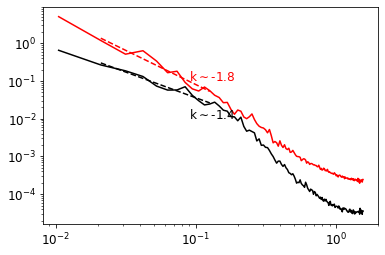

In [80]:
# Interpolate the spectra between 300 and 50 km wavenumber
def fit_slope(highscale, lowscale, k, S):
    k_high = np.log10(2*np.pi/highscale)
    k_low = np.log10(2*np.pi/lowscale)
    k_i = np.linspace(k_high, k_low,100)

    Fi = interp1d(np.log10(k), np.log10(S))
    
    S_roms_i_log = Fi(k_i)
    p1 = np.polyfit(k_i, S_roms_i_log, 1)
    
    return p1, 10**k_i, 10**(p1[1]+p1[0]*k_i)

proms, ki, S_roms_fit = fit_slope(300, 50, k_x, S_roms)
proms4d, ki, S_roms4d_fit = fit_slope(300, 50, k_x, S_roms_4d)

plt.figure()
# plt.loglog(k_x, S_zonal[0,:])
# plt.loglog(k_x, S_zonal[2,:])
plt.loglog(k_x, S_roms,'r')
plt.loglog(k_x, S_roms_4d,'k')

# plt.loglog(10**k_i, 10**S_roms_i_log, 'r.')
plt.loglog(ki, S_roms_fit,'r--')
plt.loglog(ki, S_roms4d_fit,'k--')

plt.text(0.09, 1e-1, 'k$\sim$%3.1f'%proms[0],color='r')
plt.text(0.09, 1e-2, 'k$\sim$%3.1f'%proms4d[0],color='k')

In [36]:
# Interpolate the hw8 data onto a grid
X_hw8 = myds_hw8['lon'].values
Y_hw8 = myds_hw8['lat'].values
X,Y = np.meshgrid(X_hw8,Y_hw8)

xyin = np.array([X.ravel(), Y.ravel()]).T
Fi_h = BarycentricInterp(xyin, xyout)



In [81]:
sst_h8_i = Fi_h(myds_hw8.values.ravel()).reshape((ny,nx))


In [82]:
k_x, S_hw8_zonal = power_spectra( sst_h8_i-sst_h8_i.mean(axis=0), dt=dx/(2*np.pi), axis=1)

S_hw8 = np.median(S_hw8_zonal,axis=0)

phw8, ki, S_hw8_fit = fit_slope(300, 50, k_x, S_hw8)


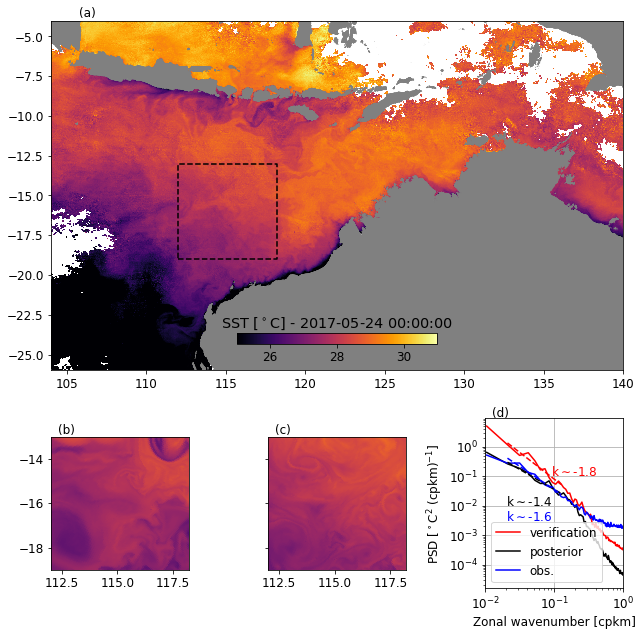

In [83]:
plt.figure(figsize=(9,9))
ax=plt.subplot2grid((3,3),(0,0), colspan=3, rowspan=2)
plt.pcolormesh(X_hw8, Y_hw8, myds_hw8.values, vmin=25,vmax=31, cmap='inferno')
cb=plt.colorbar(orientation='horizontal',pad=-0.1, shrink=0.35)
ax.set_aspect('equal')
plt.plot([xlims[0],xlims[1],xlims[1],xlims[0],xlims[0]],
        [ylims[0],ylims[0],ylims[1],ylims[1],ylims[0]],'k--')

cb.ax.set_title('SST [$^\circ$C] - {}'.format(mytime))
plotmap(mapfile, fieldname=None)
plt.text(0.05,1.01, '(a)', transform=ax.transAxes)

ax1=plt.subplot2grid((3,3),(2,0), colspan=1, rowspan=1)
plt.pcolormesh(sst['lon_rho'],sst['lat_rho'], sst.values, vmin=25,vmax=31, cmap='inferno')
ax1.set_xlim(xlims)
ax1.set_ylim(ylims)
ax1.set_aspect('equal')
# plt.title('verification - SST')
# ax1.set_xticklabels([])
plt.text(0.05,1.02, '(b)', transform=ax1.transAxes)

ax2=plt.subplot2grid((3,3),(2,1), colspan=1, rowspan=1)
plt.pcolormesh(sst['lon_rho'],sst['lat_rho'], sst4d.values, vmin=25,vmax=31, cmap='inferno')
ax2.set_xlim(xlims)
ax2.set_ylim(ylims)
ax2.set_aspect('equal')
ax2.set_yticklabels([])
# plt.title('posterior - SST')
plt.text(0.05,1.02, '(c)', transform=ax2.transAxes)

# PSD plot
ax4=plt.subplot2grid((3,3),(2,2), colspan=1, rowspan=1)
plt.loglog(k_x, S_roms,'r')
plt.loglog(k_x, S_roms_4d,'k')
plt.loglog(k_x, S_hw8,'b')

# plt.loglog(10**k_i, 10**S_roms_i_log, 'r.')
plt.loglog(ki, S_roms_fit,'r--')
plt.loglog(ki, S_roms4d_fit,'k--')
plt.loglog(ki, S_hw8_fit,'b--')

plt.text(0.09, 1e-1, 'k$\sim$%3.1f'%proms[0],color='r')
plt.text(0.02, 1e-2, 'k$\sim$%3.1f'%proms4d[0],color='k')
plt.text(0.02, 3e-3, 'k$\sim$%3.1f'%phw8[0],color='b')

plt.legend(('verification','posterior','obs.'),loc='lower left')
plt.xlabel('Zonal wavenumber [cpkm]')
plt.ylabel('PSD [$^\circ$C$^2$ (cpkm)$^{-1}$]')
plt.xlim(1e-2,1)
plt.grid(b=True)
plt.text(0.05,1.01, '(d)', transform=ax4.transAxes)

plt.tight_layout()

plt.savefig('../FIGURES/ROMS_HW8_SST_Wavenumber_Spectra_{}.png'.format(mytime[0:11]),dpi=150)